In [2]:
import numpy as np
import matplotlib.pyplot as pl
from mpl_toolkits import mplot3d

# Task A

In [3]:
Nc = 10
w = np.linspace(1,10,10)
weights = np.array([5,2,0,3,1,8,2,3,7,6])
phase = np.array([np.pi/2,np.pi,np.pi/2,0,3/2*np.pi,np.pi,0,3/2*np.pi,np.pi,0])

In [4]:
# Discrete Fourier Transform
def DFT(yn):
    # y: values of the function, in time domain
    N = len(yn)
    w = 2*np.pi/N
    FTk = np.zeros(N,dtype=complex)
    for k in range(0,N):
        for n in range(0,N):
            FTk[k] += np.exp(-1j*k*w*n)*yn[n]
    return FTk

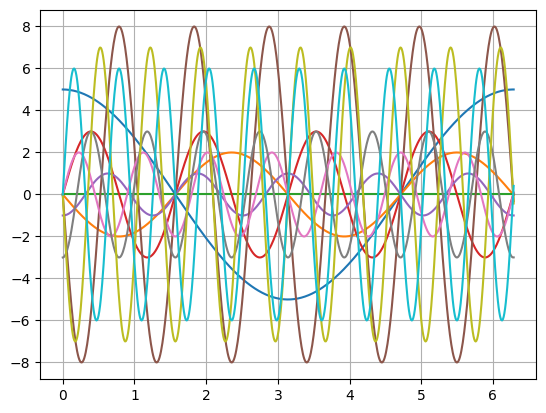

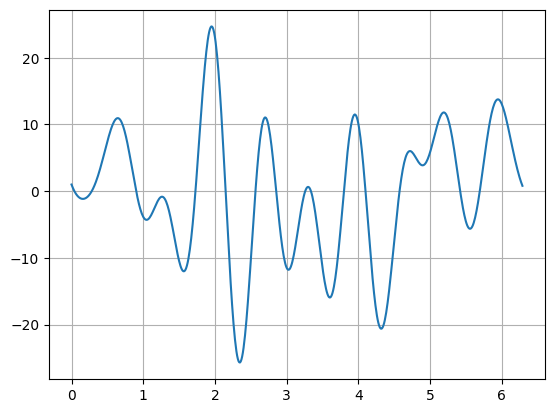

In [5]:
# a
dt = 0.01
t = np.arange(0,2*np.pi+dt,dt)
for i in range(Nc):
    yc = weights[i]*np.sin(w[i]*t+phase[i])
    pl.plot(t,yc)
pl.grid()
pl.show()

# b
y = np.zeros(len(t))
for i in range(Nc):
    y += weights[i]*np.sin(w[i]*t+phase[i])
pl.plot(t,y)
pl.grid()

[ 1.00000000e+00  7.20589590e-01  4.62276973e-01  2.24858171e-01
  8.03363976e-03 -1.88574488e-01 -3.65405154e-01 -5.22941359e-01
 -6.61693634e-01 -7.82184252e-01 -8.84932369e-01 -9.70440344e-01
 -1.03918139e+00 -1.09158874e+00 -1.12804648e+00 -1.14888215e+00
 -1.15436120e+00 -1.14468342e+00 -1.11998127e+00 -1.08032029e+00
 -1.02570134e+00 -9.56064901e-01 -8.71297055e-01 -7.71237335e-01
 -6.55688096e-01 -5.24425380e-01 -3.77211050e-01 -2.13806027e-01
 -3.39844064e-02  1.62451764e-01  3.75657275e-01  6.05728366e-01
  8.52687395e-01  1.11646782e+00  1.39689975e+00  1.69369629e+00
  2.00644096e+00  2.33457633e+00  2.67739421e+00  3.03402747e+00
  3.40344375e+00  3.78444117e+00  4.17564621e+00  4.57551380e+00
  4.98232984e+00  5.39421600e+00  5.80913698e+00  6.22491021e+00
  6.63921781e+00  7.04962094e+00  7.45357625e+00  7.84845446e+00
  8.23156076e+00  8.60015699e+00  8.95148527e+00  9.28279290e+00
  9.59135828e+00  9.87451753e+00  1.01296916e+01  1.03544135e+01
  1.05463554e+01  1.07033

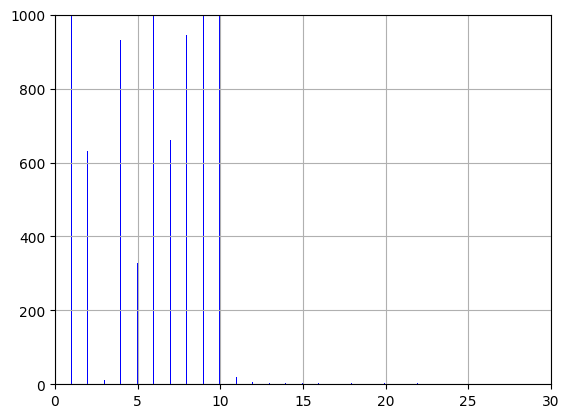

In [6]:
# determine the discrete FT
print(y)
FT = DFT(y)
Nt = len(t)
df = 1/(Nt*dt) # frequency step
f = np.arange(0,1/dt,df)
pl.bar(f[:int(Nt/2)]*2*np.pi,abs(FT[:int(Nt/2)]),width=0.04,color='b')
pl.grid()
pl.axis([0,30,0,1000])
print(f[0],f[-1])

# Task B

In [7]:
def funcN(t,y):
    f = np.ndarray(len(y))
    
    f[0] = y[1]
    f[1] = y[2]
    f[2] = y[3]
    f[3] = -2*y[2] - y[0] + 3*np.sin(t) - 5*np.cos(t)

    return f

In [8]:
# System of N ODEs with Forward Euler
def FwEulerN(Y0,t0,tend,h):
    # determine the number of equations, i.e. variables
    Nv = len(Y0)
    # compose nodal times
    t = np.arange(t0,tend+h,h)
    # determine the number of time steps
    Nt = len(t)
    # allocate output array
    Y = np.ndarray((Nv,Nt))
    # initialise the solutions
    t[0] = t0
    Y[:,0] = Y0
    # compute the solution incrementally at subsequent time steps
    for it in range(1,Nt):
        f = funcN(t[it-1],Y[:,it-1])
        for iv in range(0,Nv):
            Y[iv,it] = Y[iv,it-1] + f[iv] * h
    return (t,Y)

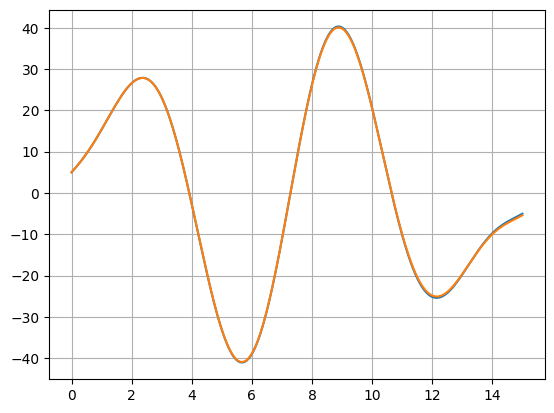

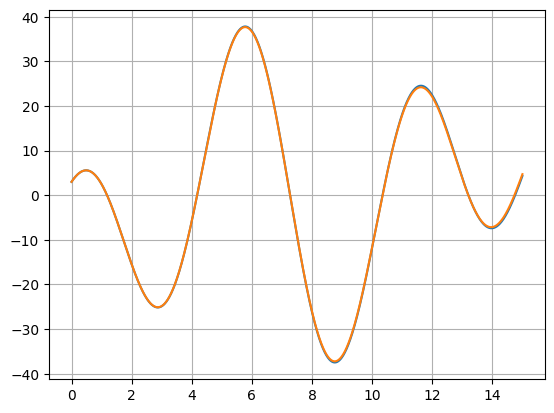

In [9]:
# set the initial coditions 
Y0 = np.ndarray(4)
Y0[0] = 5
Y0[1] = 8
Y0[2] = 3
Y0[3] = 10

(t,Y) = FwEulerN(Y0,0,15,0.001)
pl.plot(t,Y[0,:])


# analytical solution
# c1 = y0
# c2 + c3 = y0-1
# 2*c4 - c1 + 5/4 = y0-2
# - c2 - 3*c3 - 9/4 = y0-3

c1 = Y0[0]
c3 = -0.5*(Y0[1]+Y0[3]+9/4)
c4 = 0.5*(Y0[2]-5/4+c1)
c2 = Y0[1] - c3
yan = c1*np.cos(t)+c2*np.sin(t)+c3*t*np.cos(t)+c4*t*np.sin(t)-3/8*t**2*np.sin(t)+5/8*t**2*np.cos(t)
pl.plot(t,yan)
pl.grid()
pl.show()



# plot second derivative
pl.plot(t,Y[2,:])
y2an = (5*np.cos(t))/4 - (3*np.sin(t))/4 - (5*t**2*np.cos(t))/8 + (3*t**2*np.sin(t))/8 - c1*np.cos(t) + 2*c4*np.cos(t) - c2*np.sin(t) - 2*c3*np.sin(t) - (3*t*np.cos(t))/2 - (5*t*np.sin(t))/2 - c3*t*np.cos(t) - c4*t*np.sin(t)
pl.plot(t,y2an)
pl.grid()
pl.show()

# Task C

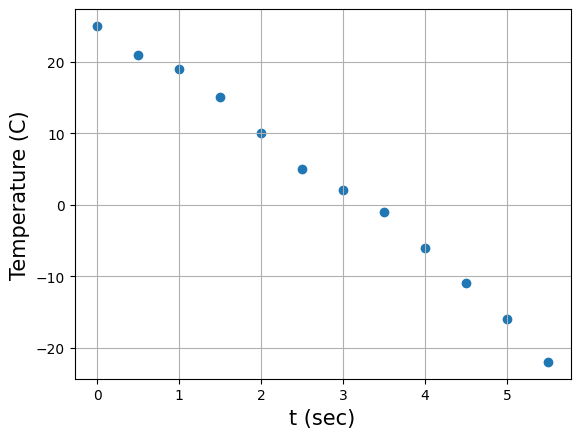

In [10]:
f = open('Temperatures.txt','r')
tmp = f.readlines()
f.close
yn = []
for v in tmp:
    yn += [float(v)]
yn = np.array(yn)
Nt = len(yn)
dt = 0.5
xn = np.arange(0,Nt*dt,dt)
pl.scatter(xn,yn)
pl.grid()
pl.xlabel('t (sec)',fontsize=15)
pl.ylabel('Temperature (C)',fontsize=15)
pl.show()

In [11]:
# Langrangian polynomial
# compute the Lagrangian polynomials j, given nodes xn at a given point xp
def Lagrangian(j,xn,xp):
    # establish the number of nodes
    n = len(xn)
    # the order of the polynomial will then be n-1
    
    # set the initial value of the polynomial to 1
    L = 1
    # range of k is from 0 to n-1 (the order of the polynomial)
    for k in range(0,n):
        # exclude the case k == j
        if k != j:
            L *= (xp-xn[k]) / (xn[j]-xn[k])
    return L

In [12]:
def LagInterp(xn,yn,x):
    N = len(xn)
    # establish the order of the interpolating polynomial, N-1
    n = N - 1
    y = np.ndarray(len(x))
    # interpolate for all the values of x in the interpolating range
    for i in range(len(x)):
        # evaluate pn(xp)
        yp = 0
        # use Langrangian polynomial up to n, included
        for j in range(0,n+1):
            yp += yn[j] * Lagrangian(j,xn,x[i])
        # add the curren value of yp to the list of y
        y[i] = yp
    return y

In [13]:
def func(x,xn,yn):
    f = LagInterp(xn,yn,[x])
    return f

In [14]:
def mybisection(a,b,eps,xn,yn):
    # repeat the split of teh interval until the bracketing intervla becomes smaller than the accuracy
    while abs(a-b)>eps:
        # calculate the mid point
        xm = (a + b) / 2
        # establish in which subinterval the solution lies
        # compute f(a) * f(xm)
        ff = func(a,xn,yn) * func(xm,xn,yn)
        if ff < 0: 
            # the solution lies in the left interval
            # set the upper bracket as xm
            b = xm
        else:
            # the solution lies in the right interval
            # set the lower bracket as xm
            a = xm
            
    # the true solution is bracketed within the latest interval [a,b]
    # we can approximate it with the midpoint
    sol = (a + b) / 2
    
    return sol

In [15]:
sol = mybisection(20,-20,0.005,xn,yn)
print(sol)

3.36669921875


# Task D

In [16]:
# function trapz: compute numerical integration with trapezium rule, for nodes at any distance
def trapz(x,y):
    # get the number of subintervals
    N = len(x) - 1
    # compute the integral
    # set range for the trapezia: there are as many trapezia as the number of intervals
    R = range(0,N)
    S = 0
    for i in R:
        # compute the area of this single trapezium (remind yourself the area of a trapezium)
        S += 0.5 * (y[i+1] + y[i]) * (x[i+1] - x[i])
    return S

In [17]:
# b
# set the step intervals in x and y
dx = 0.01
dy = 0.01
R = 10
r = 4
Rmaj = R+r
Rmin = R-r

# set the x range, not including the boundaries
x = np.arange(-Rmaj+dx,Rmaj,dx)
N = len(x)
# the y range depends of the various values of x, and cannot be fixed here

# integrate in dy, for all the value of x, i.e. find G(x)
G = np.zeros(N)
# for every x
for i in range(0,N):
    # determine the boundaries m and p for this x
    px = np.sqrt(Rmaj**2-x[i]**2)
    if abs(x[i])>=Rmin:
        y = np.arange(-px+dy,px,dy)
    else:
        mx = np.sqrt(Rmin**2-x[i]**2)
        y = np.concatenate( [ np.arange(-px+dy,-mx,dy) , np.arange(mx+dy,px,dy) ] )      
    z = np.zeros(len(y))
    # determine the values of the function z(x,y)
    for j in range(0,len(y)):
        z[j] = np.sqrt( r**2 - ( R-np.sqrt(x[i]**2+y[j]**2) )**2 ) # integrand
    
    # integrate in dy from cx to dx (for this specific x)
    G[i] = trapz(y,z) # G(x)

# integrate G(x) in dx
V = trapz(x,G)
Vtot = V*2
print(Vtot)

Van = 2*np.pi**2*R*r**2
print(Van)


3206.1024373463592
3158.273408348595


/var/folders/nh/d6mbhcsn0bv2bd2bq4cj0vh40000gn/T/ipykernel_69512/3580429775.py:8: RuntimeWarning: invalid value encountered in sqrt
  Z = np.sqrt( r**2 - ( R-np.sqrt(X**2+Y**2) )**2 )


(-16.03020833333329,
 16.030208333332695,
 -16.03020833333329,
 16.030208333332695,
 -12.022656249999747,
 12.022656249999747)

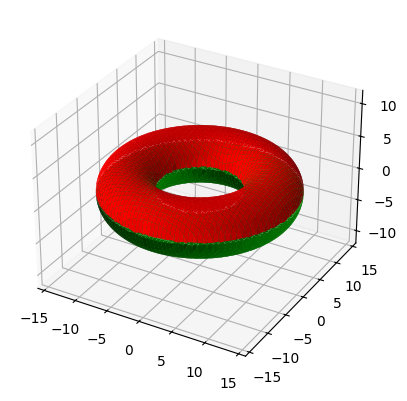

In [18]:
# c
# plotting section
x = np.arange(-Rmaj+dx,Rmaj,dx)
y = np.arange(-Rmaj+dy,Rmaj,dy)
[X, Y] = np.meshgrid(x,y)


Z = np.sqrt( r**2 - ( R-np.sqrt(X**2+Y**2) )**2 )

ax = pl.axes(projection='3d')
ax.plot_surface(X,Y,Z,color='r')
ax.plot_surface(X,Y,-Z,color='g')
pl.axis('equal')